In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl
import matplotlib
matplotlib.rcParams['font.size'] = 12

import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


## custom lightcurves from TESS full frame images

### long (30-minute) cadence 

In [2]:
l = cr.LongCadence(toiid=837)

Available sectors: [10, 11]
Using sector=10.


Searching targetpixelfile using Tesscut
Applying data quality mask identified in Data Release Notes (sector 11):
t>1599.94148|t<1609.69425|t>1614.19842

aperture photometry mask: threshold



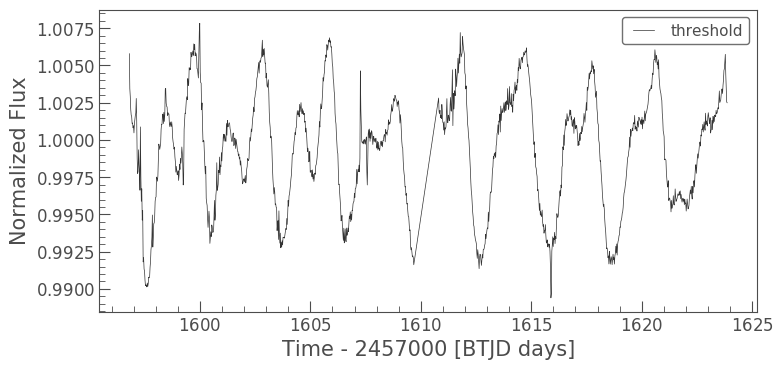

In [5]:
sap_mask='threshold'
sigma=5

lc = l.make_custom_lc(sector=11, sap_mask=sap_mask, threshold_sigma=sigma)
lc.plot(label=sap_mask)

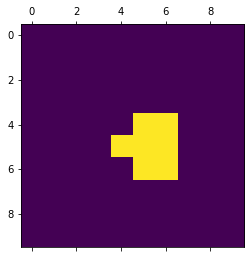

In [6]:
x = y = l.tpf_tesscut.shape[-1]//2
tpf = l.tpf_tesscut.cutout(center=(x,y), size=10)

aper_mask = cr.parse_aperture_mask(tpf, sap_mask=sap_mask, threshold_sigma=sigma)
pl.matshow(aper_mask)

Querying Gaia DR2 catalog for 157.037 -64.5052 within 60.0 arcsec.

Brightest star detected is near the edges.
Aperture mask is placed at the center instead.



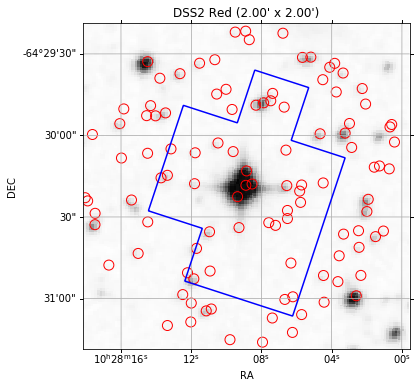

In [14]:
import astropy.units as u

# x = y = l.tpf_tesscut.shape[-1]//2
tpf = l.tpf_tesscut#.cutout(center=(x,y), size=10)
gaia_sources = l.query_gaia_dr2_catalog(radius=60)
gaiaid = gaia_sources.iloc[0]['source_id']
sap_mask = 'threshold'
kwargs = {'aper_radius': 1, 'percentile': 80, 'threshold_sigma': 6}

masks = ['round','square','percentile','threshold']
for n,sap_mask in enumerate(masks):
    _ = cr.plot_gaia_sources(tpf, gaiaid, gaia_sources, fov_rad=2*u.arcmin, 
         survey='DSS2 Red', sap_mask=sap_mask, verbose=False, 
         **kwargs
        );
fig.tight_layout()

Applying data quality mask identified in Data Release Notes (sector 11):
t>1599.94148|t<1609.69425|t>1614.19842

aperture photometry mask: round (r=1 pix)

Applying data quality mask identified in Data Release Notes (sector 11):
t>1599.94148|t<1609.69425|t>1614.19842

aperture photometry mask: square (1x1 pix)

Brightest star detected is near the edges.
Aperture mask is placed at the center instead.

Applying data quality mask identified in Data Release Notes (sector 11):
t>1599.94148|t<1609.69425|t>1614.19842

aperture photometry mask: percentile (80%)

Applying data quality mask identified in Data Release Notes (sector 11):
t>1599.94148|t<1609.69425|t>1614.19842

aperture photometry mask: threshold



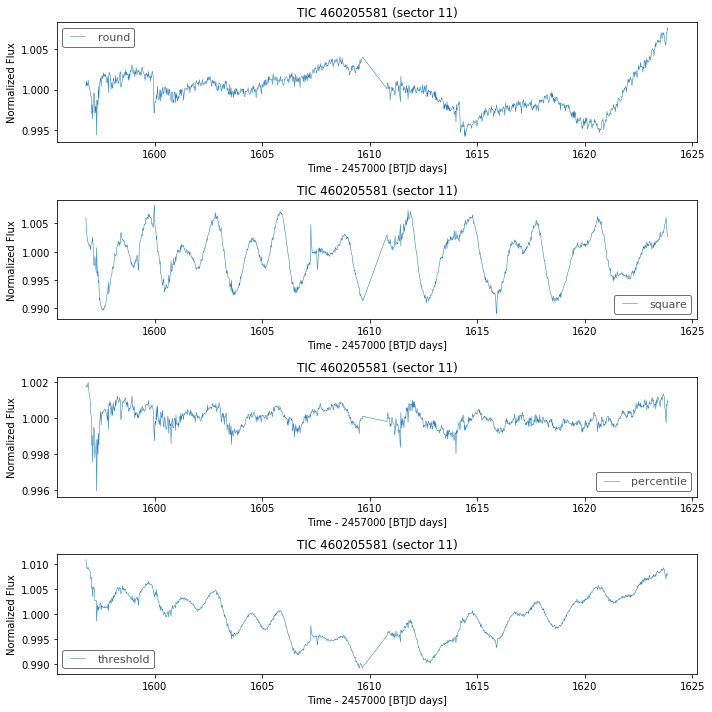

In [13]:
#custom lightcurves with varying apertures
masks = ['round','square','percentile','threshold']
fig, axs = pl.subplots(len(masks),1, figsize=(10,10))
kwargs = {'aper_radius': 1, 'percentile': 80, 'threshold_sigma': 6}

custom_lcs = {}
for n,sap_mask in enumerate(masks):
    lc = l.make_custom_lc(sector=11, sap_mask=sap_mask, aper_radius=1, percentile=80, threshold_sigma=3)
    lc.plot(ax=axs[n],label=sap_mask)
    custom_lcs[sap_mask] = lc
    axs[n].set_title(f'TIC {l.ticid} (sector {lc.sector})')
    
#     _ = cr.plot_gaia_sources(tpf, gaiaid, gaia_sources, fov_rad=2*u.arcmin, 
#          survey='DSS2 Red', sap_mask=sap_mask, verbose=False, ax=axs[n,1], 
#          **kwargs
#         );
fig.tight_layout()

Querying Gaia DR2 catalog for 157.037 -64.5052 within 3.0 arcsec.



Text(0.5, 1.0, 'TIC 460205581 (sector 10)')

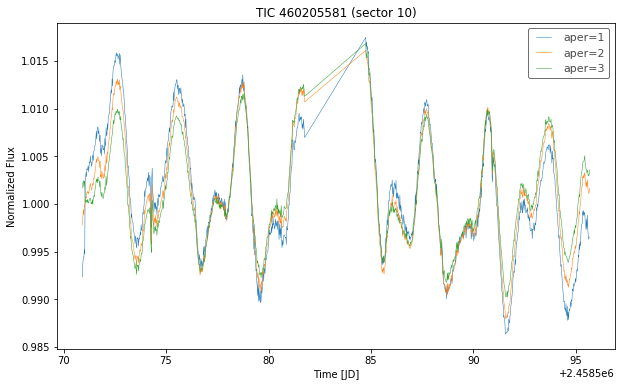

In [15]:
#CDIPS
cdips_lcs = {}
fig, ax = pl.subplots(1,1, figsize=(10,6))
for aper in [1,2,3]:
    lc = l.get_cdips_lc(sector=11, aper_idx=aper, verbose=False)
    lc.plot(ax=ax, label=f'aper={aper}')
    cdips_lcs[aper] = lc
ax.set_title(f'TIC {l.ticid} (sector {lc.sector})')

### short cadence

In [34]:
import chronos as cr

s = cr.ShortCadence(toiid=837)

Available sectors: [10, 11]
Using sector=10.


In [35]:
s.ticid

460205581

In [ ]:
#custom lc
custom_lc = s.make_custom_lc(sap_mask='pipeline')
s.lc_custom.plot(ax=ax, label='custom')
ax.set_title(f'TIC {s.ticid} (sector {s.sector})')

Searching lightcurvefile using lightkurve


Text(0.5, 1.0, 'TIC 460205581 (sector 10)')

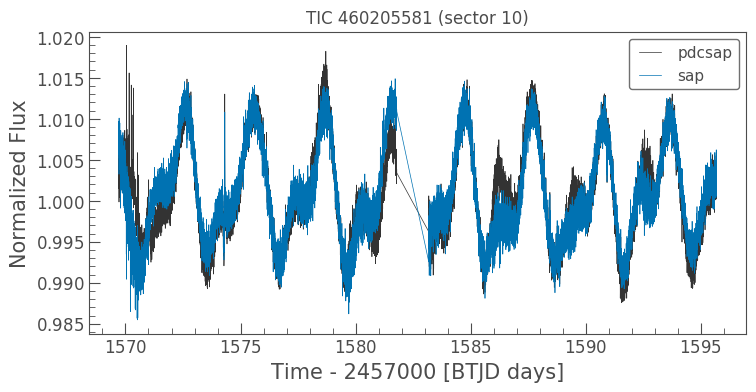

In [37]:
#get pipeline lc
pdcsap = s.get_lc(lctype='pdcsap')
ax = pdcsap.plot(label='pdcsap')

sap = s.get_lc(lctype='sap')
sap.plot(ax=ax, label='sap')
ax.set_title(f'TIC {s.ticid} (sector {pdcsap.sector})')

## CDIPS lightcurves

In [1]:
import chronos as cr

t = cr.Target(toiid=681)
t.query_gaia_dr2_catalog(return_nearest_xmatch=True)
t.gaiaid

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Querying Gaia DR2 catalog for 117.895 -60.4124 within 3.0 arcsec.



5290968085934209152

In [2]:
t.get_all_sectors()

[1, 4, 7, 8, 9, 10, 11, 10, 13]

The target is along galactic plane
* [youtube: sector 10](https://www.youtube.com/watch?v=hbGg8oU1qNM)
* [youtube: sector 11](https://www.youtube.com/watch?v=E_wpg9mZ5u4)

In [3]:
cdips = cr.CDIPS(gaiaDR2id=t.gaiaid, sector=7, aper_idx=3, lctype='flux', verbose=False)

In [4]:
#catalog reference(s) which claimed cluster membership
cdips.catalog_ref

'CantatGaudin_2018,GaiaCollaboration2018_tab1b,Zari_2018_UMS,CantatGaudin_2018,GaiaCollaboration2018_tab1b,Zari_2018_UMS'

In [5]:
#star name(s) in catalog ref
cdips.catalog_gaiaids

'5290968085934209152,5290968085934209152,5290968085934209152,5290968085934209152,5290968085934209152,5290968085934209152'

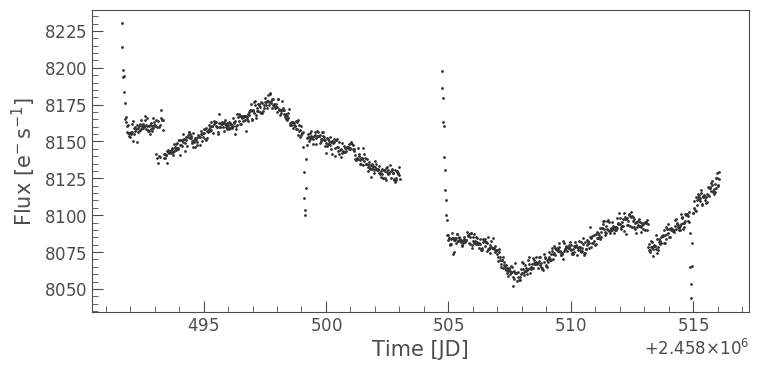

In [6]:
cdips.lc.scatter()

(-0.07001339583333334, 0.07001339583333334)

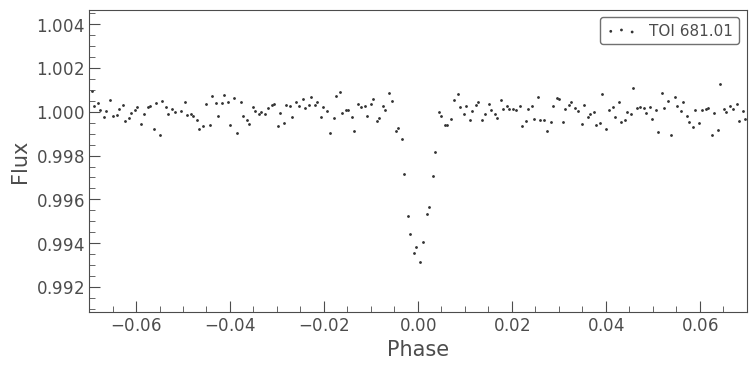

In [7]:
%matplotlib inline

toi = 681
#get ephemeris from TOI release (https://tev.mit.edu/data/)
d = cr.get_toi(toi=f'{toi}.01', verbose=False)
per, t0, dur = d[['Period (days)', 'Epoch (BJD)', 'Duration (hours)']].values[0]

t = cr.Target(toiid=toi, verbose=False)
t.query_gaia_dr2_catalog(return_nearest_xmatch=True)
#initialize cdips
cdips = cr.CDIPS(gaiaDR2id=t.gaiaid, sector=7, aper_idx=1, verbose=False)
#get lc and turn into lk.TessLightCurve
lc = cdips.lc
#add label
lc.label = f'TOI {toi}.01'
#plot
ax = lc.remove_outliers().flatten(window_length=51).fold(period=per, t0=t0).scatter()
ax.set_xlim([-dur/24/2,dur/24/2])

In [65]:
#multi sector
%matplotlib inline

toi = 681

#get ephemeris from TOI release (https://tev.mit.edu/data/)
d = cr.get_toi(toi=f'{toi}.01', verbose=False)
per, t0 = d[['Period (days)', 'Epoch (BJD)']].values[0]
        
t = cr.Target(toiid=toi, verbose=False)
#get gaia id
t.query_gaia_dr2_catalog(return_nearest_xmatch=True)
#initialize cdips

lcs = {}
#available sectors
for sector in t.get_all_sectors():
    try:
        cdips = cr.CDIPS(gaiaDR2id=t.gaiaid, sector=sector, aper_idx=3, verbose=False)
        #get lc and turn into lk.TessLightCurve
        lc = cdips.lc
        #add label
        lc.label = f'TOI {toi}.01'
        lcs[sector]=lc
    except:
        print(f'sector {sector} is not available.')

sector 1 is not available.
sector 4 is not available.
sector 13 is not available.


(-0.05, 0.05)

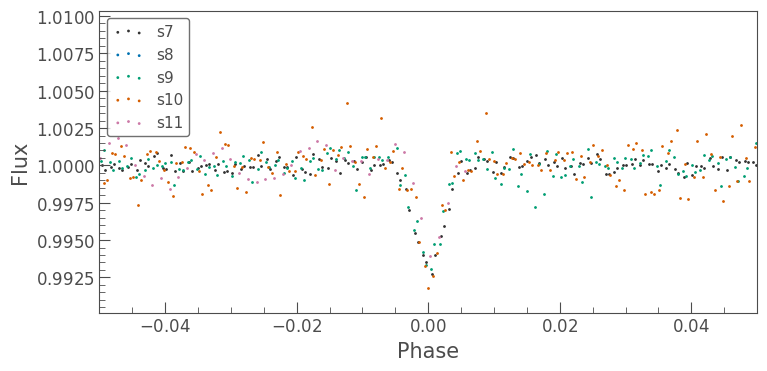

In [66]:
#plot
ax = lcs[7].remove_outliers().flatten(window_length=51).fold(period=per, t0=t0).scatter(label='s7')
lcs[8].remove_outliers().flatten(window_length=51).fold(period=per, t0=t0).scatter(ax=ax, label='s8')
lcs[9].remove_outliers().flatten(window_length=51).fold(period=per, t0=t0).scatter(ax=ax, label='s9')
lcs[10].remove_outliers().flatten(window_length=51).fold(period=per, t0=t0).scatter(ax=ax, label='s10')
lcs[11].remove_outliers().flatten(window_length=51).fold(period=per, t0=t0).scatter(ax=ax, label='s11')
ax.set_xlim([-0.05,0.05])

## K2 lightcurves

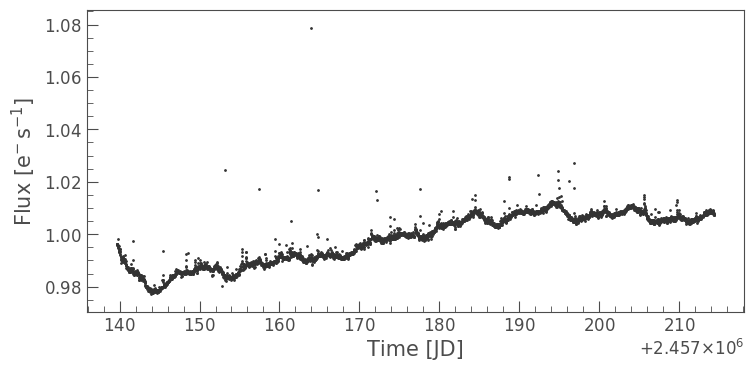

In [68]:
%matplotlib inline
import chronos as cr

eve = cr.Everest(epicid=211314705, campaign=5, verbose=False)
eve.lc.scatter()

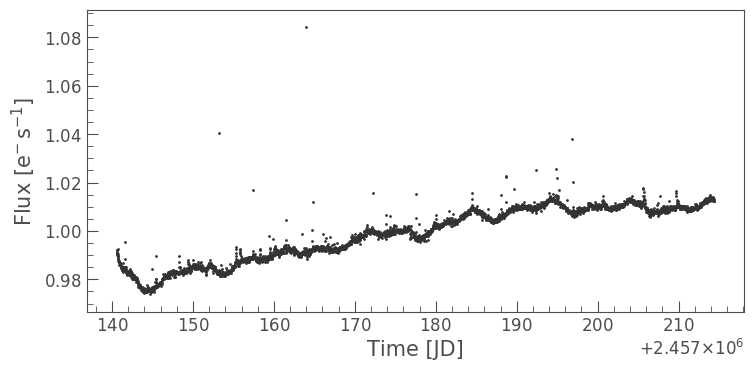

In [69]:
k2sff = cr.K2SFF(epicid=211314705, campaign=5, verbose=False)
k2sff.lc.scatter()